<a href="https://colab.research.google.com/github/Parhanlah/UAS-MECHINE-LEARNING/blob/main/Pengolahan_data_pertanian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FARKHAN ADI NAUFAL HAFIDH G.211.21.0090


#MUHAMMAD SAFUWAN               G.211.21.0108

#ROHY BIMO SUBIANTO          G.211.21.0118

#**PERSIAPAN** **DATA**

In [ ]:
#Mengimport seluruh module yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
%matplotlib inline
uploaded = files.upload()

Saving data - Sheet1.csv to data - Sheet1 (1).csv


In [ ]:
#membaca dataset
data = pd.read_csv("data - Sheet1.csv")

In [ ]:
#memahami bentuk data dalam dataset
data.shape

(9, 8)

In [ ]:
data.columns

Index(['jenis_padi', 'harga_bibit', 'masa_pembibitan', 'masa_tanam',
       'hasil_panen', 'biaya_produksi', 'omset', 'jumlah_panen_pertahun'],
      dtype='object')

In [ ]:
# Statistik deskriptif
data.describe()

,harga_bibit,masa_pembibitan,masa_tanam,hasil_panen,biaya_produksi,omset,jumlah_panen_pertahun
count,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,70.666667,19.00000,101.111111,54.222222,4.722222,11.000000,2.555556
std,20.130822,2.44949,13.411231,23.493498,1.563472,4.062019,0.527046
min,55.000000,15.00000,70.000000,27.000000,2.500000,7.000000,2.000000
25%,60.000000,17.00000,105.000000,34.000000,3.500000,8.000000,2.000000
50%,65.000000,21.00000,105.000000,54.000000,4.500000,9.000000,3.000000
75%,65.000000,21.00000,105.000000,66.000000,6.000000,14.000000,3.000000
max,106.000000,21.00000,115.000000,99.000000,7.000000,18.000000,3.000000


In [ ]:
#memahami data dan atribut dalam dataset
print("\nInformasi Data:")
print(data.info())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jenis_padi             9 non-null      object 
 1   harga_bibit            9 non-null      int64  
 2   masa_pembibitan        9 non-null      int64  
 3   masa_tanam             9 non-null      int64  
 4   hasil_panen            9 non-null      int64  
 5   biaya_produksi         9 non-null      float64
 6   omset                  9 non-null      float64
 7   jumlah_panen_pertahun  9 non-null      int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 704.0+ bytes
None


In [ ]:
data.apply(lambda x: len(x.unique()))

jenis_padi               9
harga_bibit              5
masa_pembibitan          3
masa_tanam               5
hasil_panen              9
biaya_produksi           8
omset                    7
jumlah_panen_pertahun    2
dtype: int64

In [ ]:
#mengecek null
data.isnull().sum()

jenis_padi               0
harga_bibit              0
masa_pembibitan          0
masa_tanam               0
hasil_panen              0
biaya_produksi           0
omset                    0
jumlah_panen_pertahun    0
dtype: int64

In [ ]:
data.apply(lambda x: len(x.unique()))

jenis_padi               9
harga_bibit              5
masa_pembibitan          3
masa_tanam               5
hasil_panen              9
biaya_produksi           8
omset                    7
jumlah_panen_pertahun    2
dtype: int64

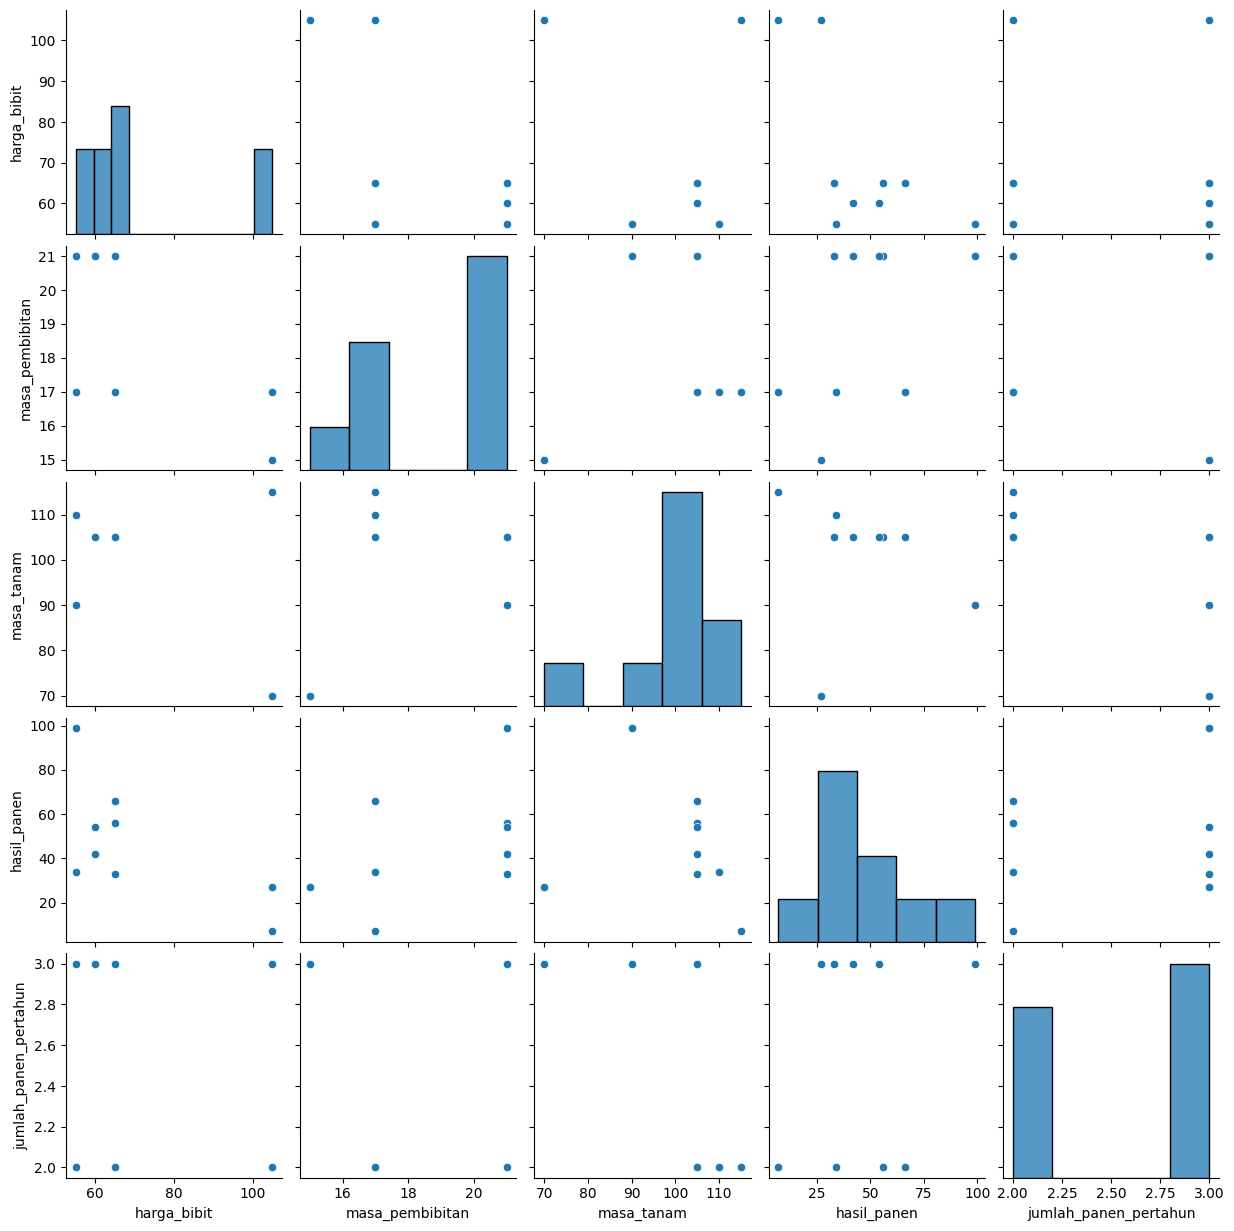

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh visualisasi
sns.pairplot(data)
plt.show()


#**Hasil Panen**

Mean Absolute Error (MAE): 9.301465000625228


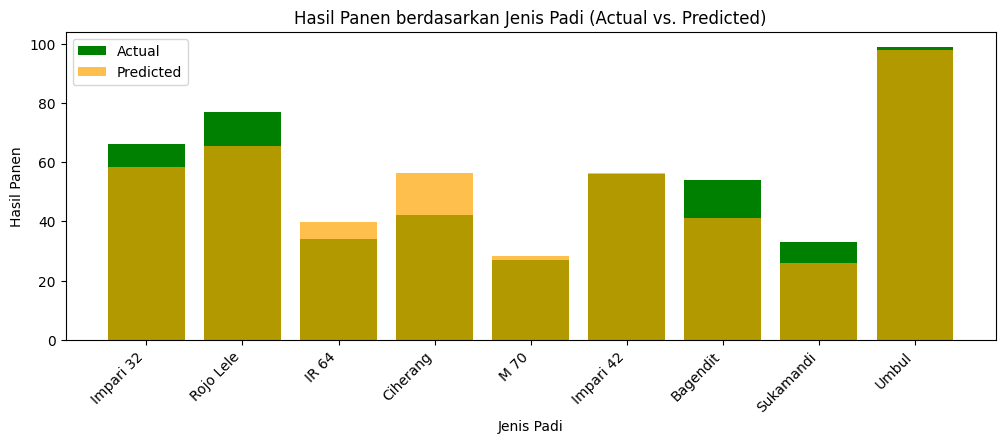

Mean Squared Error (MSE): 91.84496673574617


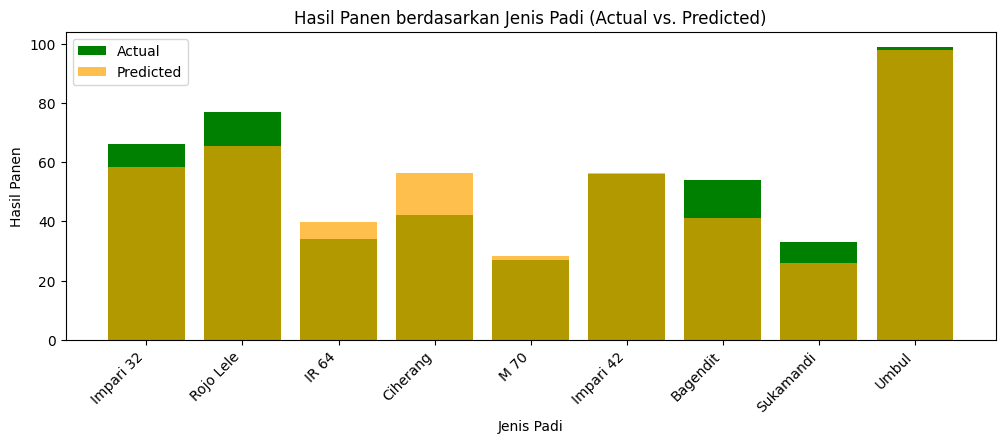

Root Mean Squared Error (RMSE): 9.583577971496146


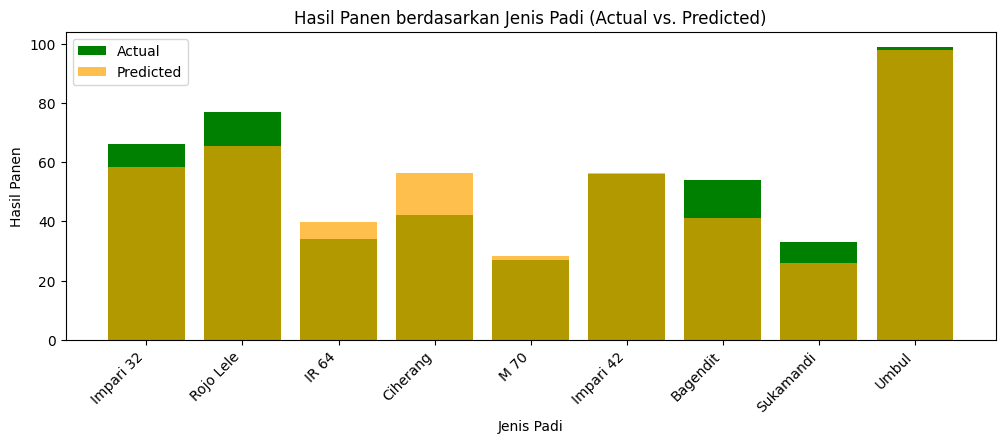

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Konversi nilai pada kolom 'hasil_panen' ke tipe data numerik
dataset['hasil_panen'] = pd.to_numeric(dataset['hasil_panen'], errors='coerce')

# Hapus baris yang memiliki nilai 'NaN' di kolom 'hasil_panen'
dataset = dataset.dropna(subset=['hasil_panen'])

# Memilih variabel target dan prediktor
X = dataset[['harga_bibit', 'masa_pembibitan', 'masa_tanam', 'biaya_produksi']]
y = dataset['hasil_panen']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Evaluasi model dengan MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Visualisasi hasil panen dalam diagram batang
plt.figure(figsize=(12, 4))
plt.bar(dataset['jenis_padi'], dataset['hasil_panen'], color='green', label='Actual')
plt.bar(dataset['jenis_padi'], model.predict(dataset[['harga_bibit', 'masa_pembibitan', 'masa_tanam', 'biaya_produksi']]),
        color='orange', alpha=0.7, label='Predicted')

plt.title('Hasil Panen berdasarkan Jenis Padi (Actual vs. Predicted)')
plt.xlabel('Jenis Padi')
plt.ylabel('Hasil Panen')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluasi model dengan MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Visualisasi hasil panen dalam diagram batang
plt.figure(figsize=(12, 4))
plt.bar(dataset['jenis_padi'], dataset['hasil_panen'], color='green', label='Actual')
plt.bar(dataset['jenis_padi'], model.predict(dataset[['harga_bibit', 'masa_pembibitan', 'masa_tanam', 'biaya_produksi']]),
        color='orange', alpha=0.7, label='Predicted')

plt.title('Hasil Panen berdasarkan Jenis Padi (Actual vs. Predicted)')
plt.xlabel('Jenis Padi')
plt.ylabel('Hasil Panen')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Evaluasi model dengan RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Visualisasi hasil panen dalam diagram batang
plt.figure(figsize=(12, 4))
plt.bar(dataset['jenis_padi'], dataset['hasil_panen'], color='green', label='Actual')
plt.bar(dataset['jenis_padi'], model.predict(dataset[['harga_bibit', 'masa_pembibitan', 'masa_tanam', 'biaya_produksi']]),
        color='orange', alpha=0.7, label='Predicted')

plt.title('Hasil Panen berdasarkan Jenis Padi (Actual vs. Predicted)')
plt.xlabel('Jenis Padi')
plt.ylabel('Hasil Panen')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

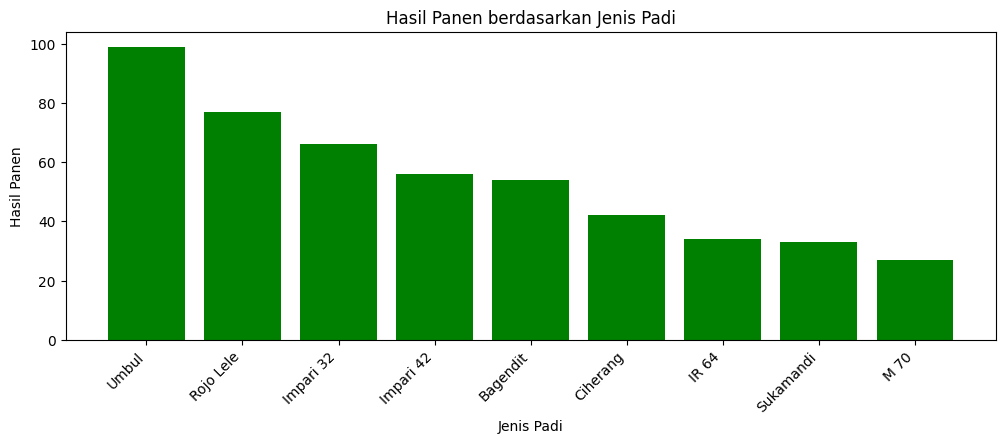

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Konversi nilai pada kolom 'hasil_panen' ke tipe data numerik
dataset['hasil_panen'] = pd.to_numeric(dataset['hasil_panen'], errors='coerce')

# Hapus baris yang memiliki nilai 'NaN' di kolom 'hasil_panen'
dataset = dataset.dropna(subset=['hasil_panen'])

# Urutkan DataFrame berdasarkan hasil panen dari yang tertinggi ke yang terendah
sorted_results = dataset.sort_values(by='hasil_panen', ascending=False)

# Tampilkan hasil panen dalam diagram batang
plt.figure(figsize=(12, 4))
plt.bar(sorted_results['jenis_padi'], sorted_results['hasil_panen'], color='green')
plt.title('Hasil Panen berdasarkan Jenis Padi')
plt.xlabel('Jenis Padi')
plt.ylabel('Hasil Panen')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x untuk memudahkan pembacaan
plt.show()


#**Jenis Padi Dengan Hasil Panen Terbanyak Dengan Harga Bibit Terendah**

Mean Squared Error: 1446.1172453543443


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

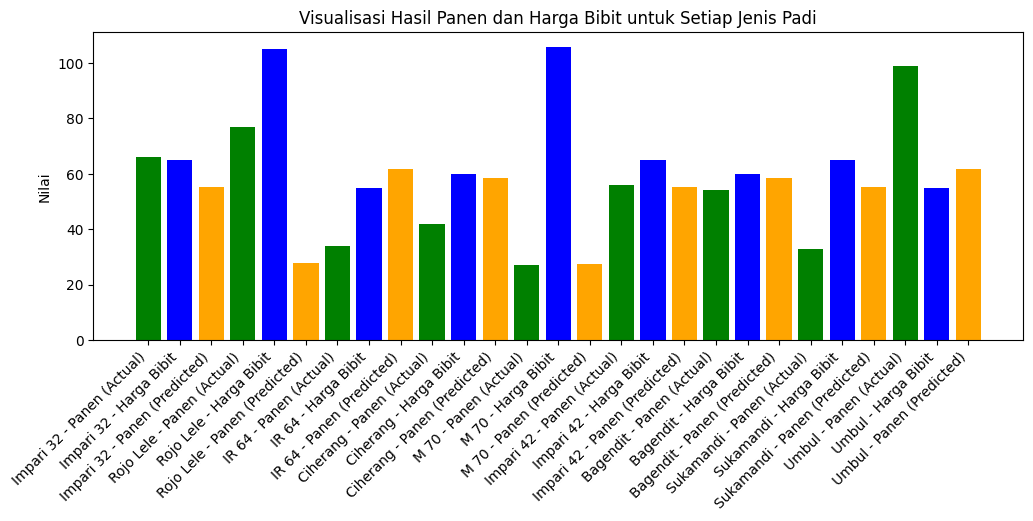

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Konversi nilai pada kolom 'hasil_panen' dan 'harga_bibit' ke tipe data numerik
dataset['hasil_panen'] = pd.to_numeric(dataset['hasil_panen'], errors='coerce')

# Hapus baris yang memiliki nilai 'NaN' di kolom 'hasil_panen' dan 'harga_bibit'
dataset = dataset.dropna(subset=['hasil_panen', 'harga_bibit'])

# Memilih variabel target dan prediktor
X = dataset[['harga_bibit']]
y = dataset['hasil_panen']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualisasi hasil panen dan harga bibit
plt.figure(figsize=(12, 4))

for index, row in dataset.iterrows():
    formatted_harga_bibit = '{:,.0f}'.format(row['harga_bibit'])
    formatted_hasil_panen = '{:,.0f}'.format(row['hasil_panen'])

    plt.bar([f'{row["jenis_padi"]} - Panen (Actual)', f'{row["jenis_padi"]} - Harga Bibit'],
            [row['hasil_panen'], row['harga_bibit']], color=['green', 'blue'])

    # Prediksi hasil panen
    prediksi_hasil_panen = model.predict([[row['harga_bibit']]])
    plt.bar(f'{row["jenis_padi"]} - Panen (Predicted)', prediksi_hasil_panen, color='orange')

plt.title('Visualisasi Hasil Panen dan Harga Bibit untuk Setiap Jenis Padi')
plt.ylabel('Nilai')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x untuk memudahkan pembacaan
plt.show()


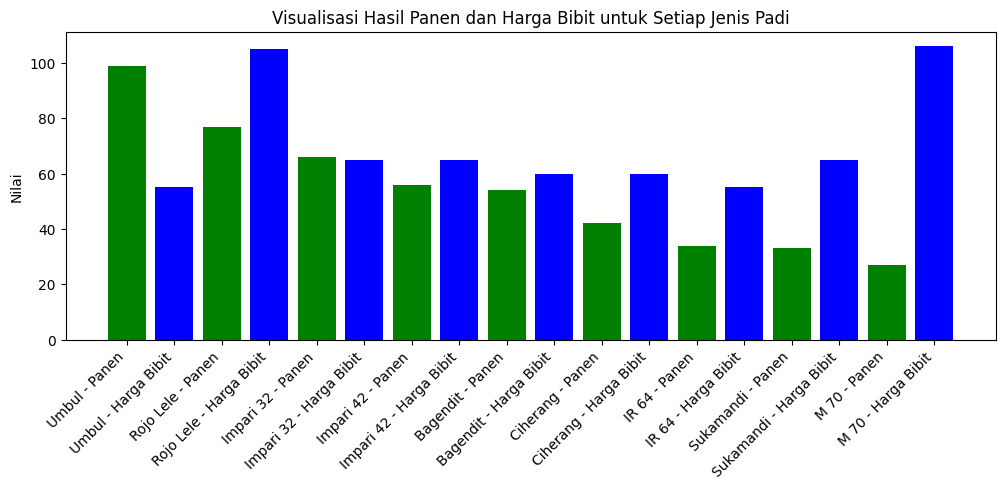

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Konversi nilai pada kolom 'hasil_panen' dan 'harga_bibit' ke tipe data numerik
dataset['hasil_panen'] = pd.to_numeric(dataset['hasil_panen'], errors='coerce')

# Hapus baris yang memiliki nilai 'NaN' di kolom 'hasil_panen' dan 'harga_bibit'
dataset = dataset.dropna(subset=['hasil_panen', 'harga_bibit'])

# Urutkan DataFrame berdasarkan hasil panen terbanyak dan harga bibit terendah
sorted_df = dataset.sort_values(by=['hasil_panen', 'harga_bibit'], ascending=[False, True])

# Tampilkan hasil dalam satu diagram batang
plt.figure(figsize=(12, 4))

for index, row in sorted_df.iterrows():
    formatted_harga_bibit = '{:,.0f}'.format(row['harga_bibit'])
    formatted_hasil_panen = '{:,.0f}'.format(row['hasil_panen'])

    plt.bar([f'{row["jenis_padi"]} - Panen', f'{row["jenis_padi"]} - Harga Bibit'],
            [row['hasil_panen'], row['harga_bibit']], color=['green', 'blue'])

plt.title('Visualisasi Hasil Panen dan Harga Bibit untuk Setiap Jenis Padi')
plt.ylabel('Nilai')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x untuk memudahkan pembacaan
plt.show()


#**Prediksi Jenis Padi Dengan Masa Tanam Tercepat**

Mean Squared Error: 619.8077307922541


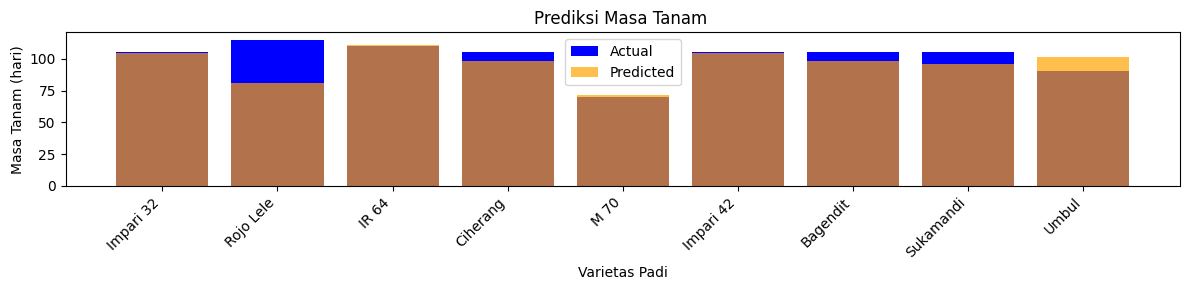

Mean Absolute Error (MAE): 21.664646370460154


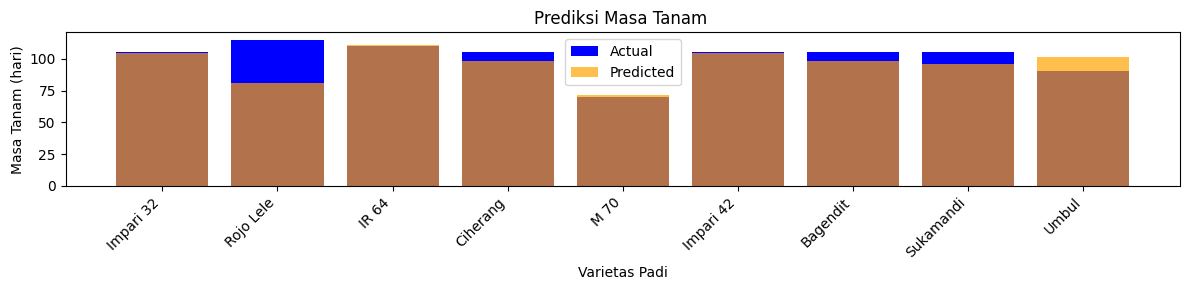

Root Mean Squared Error (RMSE): 24.895938038006403


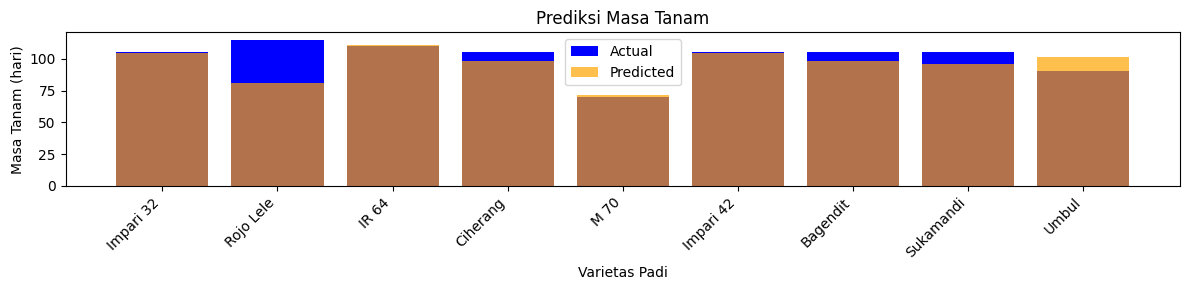

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Konversi nilai pada kolom 'masa_tanam' ke tipe data numerik
dataset['masa_tanam'] = pd.to_numeric(dataset['masa_tanam'], errors='coerce')

# Hapus baris yang memiliki nilai 'NaN' di kolom 'masa_tanam'
dataset = dataset.dropna(subset=['masa_tanam'])

# Memilih variabel target dan prediktor
X = dataset[['harga_bibit', 'jumlah_panen_pertahun']]
y = dataset['masa_tanam']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 3))
plt.bar(dataset['jenis_padi'], dataset['masa_tanam'], color='blue', label='Actual')
plt.bar(dataset['jenis_padi'], model.predict(dataset[['harga_bibit', 'jumlah_panen_pertahun']]),
        color='orange', alpha=0.7, label='Predicted')

plt.title('Prediksi Masa Tanam ')
plt.xlabel('Varietas Padi')
plt.ylabel('Masa Tanam (hari)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Evaluasi model dengan MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 3))
plt.bar(dataset['jenis_padi'], dataset['masa_tanam'], color='blue', label='Actual')
plt.bar(dataset['jenis_padi'], model.predict(dataset[['harga_bibit', 'jumlah_panen_pertahun']]),
        color='orange', alpha=0.7, label='Predicted')

plt.title('Prediksi Masa Tanam ')
plt.xlabel('Varietas Padi')
plt.ylabel('Masa Tanam (hari)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Evaluasi model dengan RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 3))
plt.bar(dataset['jenis_padi'], dataset['masa_tanam'], color='blue', label='Actual')
plt.bar(dataset['jenis_padi'], model.predict(dataset[['harga_bibit', 'jumlah_panen_pertahun']]),
        color='orange', alpha=0.7, label='Predicted')

plt.title('Prediksi Masa Tanam')
plt.xlabel('Varietas Padi')
plt.ylabel('Masa Tanam (hari)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


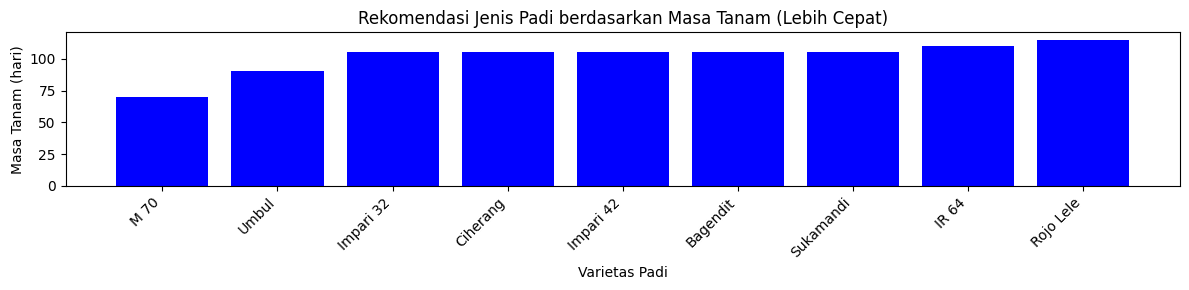

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Pilih kolom 'jenis_padi', 'harga_bibit', 'masa_tanam', dan 'jumlah_panen'
jenis_padi = dataset['jenis_padi']
harga_bibit = dataset['harga_bibit']
masa_tanam = dataset['masa_tanam']
jumlah_panen = dataset['jumlah_panen_pertahun']

# Gabungkan kolom-kolom ke dalam satu DataFrame baru
rekomendasi_df = pd.DataFrame({'jenis_padi': jenis_padi, 'harga_bibit': harga_bibit, 'masa_tanam': masa_tanam, 'jumlah_panen': jumlah_panen})

# Urutkan DataFrame berdasarkan masa tanam (secara menaik)
rekomendasi_df = rekomendasi_df.sort_values(by='masa_tanam')

# Visualisasi hasil rekomendasi dalam bentuk bar plot
plt.figure(figsize=(12, 3))
plt.bar(rekomendasi_df['jenis_padi'], rekomendasi_df['masa_tanam'], color='blue')
plt.title('Rekomendasi Jenis Padi berdasarkan Masa Tanam (Lebih Cepat)')
plt.xlabel('Varietas Padi')
plt.ylabel('Masa Tanam (hari)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**jumlah panen terbanyak dalam satu tahun**

Mean Squared Error: 3.3303425356555874


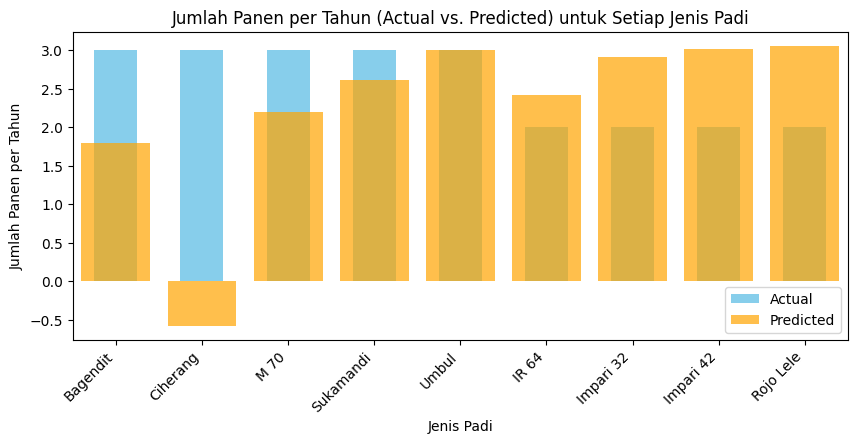

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Bersihkan nilai di kolom 'jumlah_panen'
dataset['jumlah_panen_petahun'] = dataset['jumlah_panen_pertahun']

# Kelompokkan data berdasarkan jenis padi dan hitung jumlah panen per tahun untuk setiap jenis padi
jumlah_panen_per_jenis = dataset.groupby('jenis_padi')['jumlah_panen_pertahun'].sum()

# Urutkan DataFrame berdasarkan jumlah panen terbanyak
jumlah_panen_per_jenis_sorted = jumlah_panen_per_jenis.sort_values(ascending=False)

# Memilih variabel target dan prediktor
X = dataset[['harga_bibit', 'masa_pembibitan', 'masa_tanam', 'biaya_produksi']]
y = dataset['jumlah_panen_pertahun']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualisasi hasil panen dan prediksi dalam diagram batang
plt.figure(figsize=(10, 4))
jumlah_panen_per_jenis_sorted.plot(kind='bar', color='skyblue', label='Actual')
plt.bar(jumlah_panen_per_jenis_sorted.index, model.predict(dataset[['harga_bibit', 'masa_pembibitan', 'masa_tanam', 'biaya_produksi']]),
        color='orange', alpha=0.7, label='Predicted')

plt.title('Jumlah Panen per Tahun (Actual vs. Predicted) untuk Setiap Jenis Padi')
plt.xlabel('Jenis Padi')
plt.ylabel('Jumlah Panen per Tahun')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


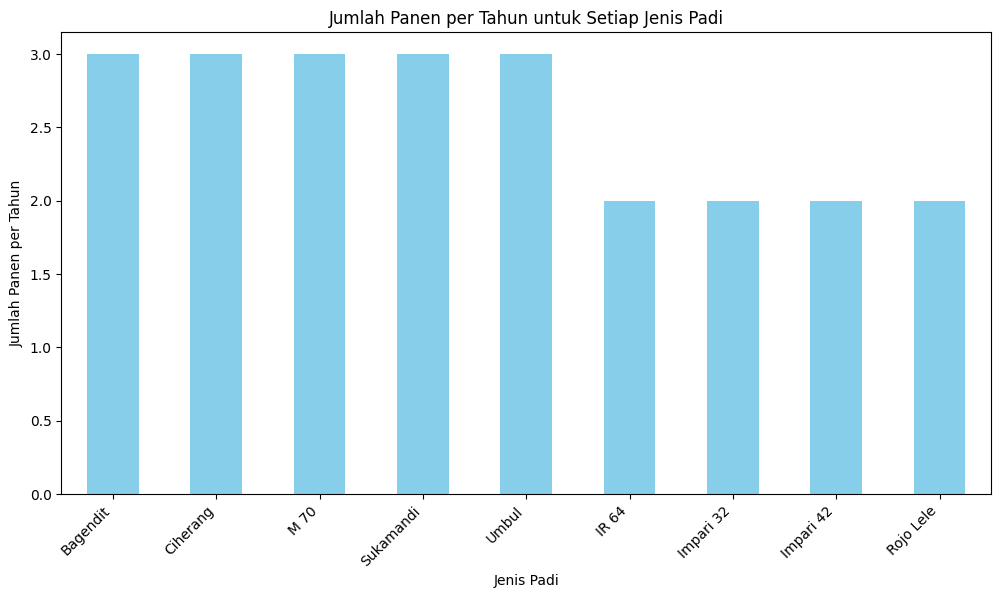

In [ ]:
# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Bersihkan nilai di kolom 'jumlah_panen'
dataset['jumlah_panen_petahun'] = dataset['jumlah_panen_pertahun']

# Kelompokkan data berdasarkan jenis padi dan hitung jumlah panen per tahun untuk setiap jenis padi
jumlah_panen_per_jenis = dataset.groupby('jenis_padi')['jumlah_panen_pertahun'].sum()

# Urutkan DataFrame berdasarkan jumlah panen terbanyak
jumlah_panen_per_jenis_sorted = jumlah_panen_per_jenis.sort_values(ascending=False)

# Tampilkan visualisasi
plt.figure(figsize=(12, 6))
jumlah_panen_per_jenis_sorted.plot(kind='bar', color='skyblue')
plt.title('Jumlah Panen per Tahun untuk Setiap Jenis Padi')
plt.xlabel('Jenis Padi')
plt.ylabel('Jumlah Panen per Tahun')
plt.xticks(rotation=45, ha='right')
plt.show()

#***MODEL ***#

In [ ]:
# Menampilkan koefisien model
print("Koefisien Model:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Koefisien Model:
harga_bibit: -0.01568871702626284
masa_pembibitan: 5.136636077684476
masa_tanam: -0.7483308483793287
biaya_produksi: 15.120229449430399


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Baca dataset menggunakan Pandas
dataset = pd.read_csv('data - Sheet1.csv')

# Bersihkan nilai di kolom 'jumlah_panen'
dataset['jumlah_panen_petahun'] = dataset['jumlah_panen_pertahun']

# Memilih variabel target dan prediktor
X = dataset[['harga_bibit', 'masa_pembibitan', 'masa_tanam', 'biaya_produksi']]
y = dataset['jumlah_panen_pertahun']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 1.2967876759106964
Mean Squared Error (MSE): 3.3303425356555874
Root Mean Squared Error (RMSE): 1.824922610867537
